In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from scipy.signal import find_peaks
from IPython.display import HTML
%matplotlib inline


In [34]:
from typing import List


def importFile(datePrefix:str, filepath:str) -> List[pd.DataFrame]:
    frames = []

    for i in range(1, 500, 1):
        filename = f'{filepath}/{datePrefix}_{i:03n}.csv'
        frame = pd.read_csv(filename, header=0, skiprows=[1], dtype={"时间": np.float64, "通道 B": np.float64})
        frame.rename(columns={"时间": "time", "通道 B": "voltage"}, inplace=True)
        frame.drop(columns=["通道 A"], inplace=True)
        frame = frame[frame["time"] > 1]
        frame = frame[frame["time"] < 5]
        frames.append(frame)
    
    return frames


In [35]:
datePrefix = "20240612-0001"
filepath = f"data/20260612_baseline/sit2_com/{datePrefix}"

frames = importFile(datePrefix=datePrefix, filepath=filepath)
time = np.asarray([frames[i].time for i in range(499)])

baselineFrames = importFile(filepath="data/20260612_baseline/ref_com_1/baseline/", datePrefix="20240612-0001")
controlVoltage = np.asarray([frames[i].voltage - baselineFrames[i].voltage for i in range(499)])

/var/folders/25/zpkgzz496b39mh7j2mgg_mbc0000gn/T/ipykernel_80807/1537423470.py:4: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  peaksFrame = np.asarray([np.asarray(find_peaks(frames[i].voltage, distance=15)[0]) for i in range(499)])
MovieWriter ffmpeg unavailable; using Pillow instead.


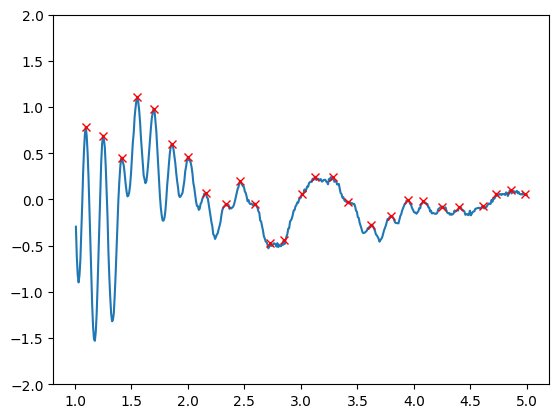

In [36]:

fig, ax = plt.subplots()
line, = ax.plot(time[0], frames[0].voltage)

peaksFrame = np.asarray([np.asarray(find_peaks(frames[i].voltage, distance=15)[0]) for i in range(499)])
voltages = [np.asarray(frames[i].voltage)for i in range(499)]


def animate(i):
    ax.clear()
    ax.set_ylim([-2, 2])
    ax.plot(time[i], voltages[i])
    ax.plot(time[i][peaksFrame[i]], voltages[i][peaksFrame[i]], 'rx')
    return line,

anim = FuncAnimation(fig, animate, frames=range(1, 499, 10), blit=True)
anim.save('output/sit2.gif', fps=60)

/var/folders/25/zpkgzz496b39mh7j2mgg_mbc0000gn/T/ipykernel_80807/3769086856.py:4: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  peaksFrame = np.asarray([np.asarray(find_peaks(baselineFrames[i].voltage, distance=15)[0]) for i in range(499)])
MovieWriter ffmpeg unavailable; using Pillow instead.


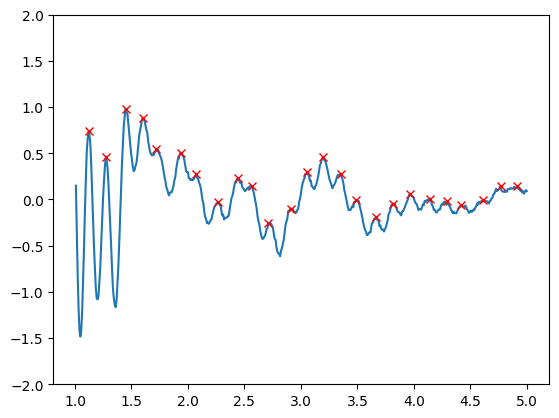

In [37]:
fig, ax = plt.subplots()
line, = ax.plot(time[0], baselineFrames[0].voltage)

peaksFrame = np.asarray([np.asarray(find_peaks(baselineFrames[i].voltage, distance=15)[0]) for i in range(499)])
voltages = [np.asarray(baselineFrames[i].voltage)for i in range(499)]

def animate(i):
    ax.clear()
    ax.set_ylim([-2, 2])
    ax.plot(time[i], voltages[i])
    ax.plot(time[i][peaksFrame[i]], voltages[i][peaksFrame[i]], 'rx')
    return line,

    
anim = FuncAnimation(fig, animate, frames=range(1, 499, 10), blit=True)
anim.save('output/baseline.gif', fps=60)



/var/folders/25/zpkgzz496b39mh7j2mgg_mbc0000gn/T/ipykernel_80807/3423029.py:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  peaksFrame = np.asarray([np.asarray(find_peaks(controlVoltage[i], distance=15)[0]) for i in range(499)])
MovieWriter ffmpeg unavailable; using Pillow instead.


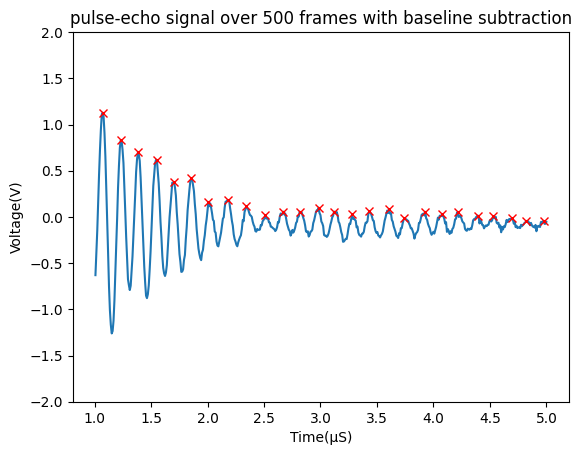

In [50]:

fig, ax = plt.subplots()
line, = ax.plot(time[0], controlVoltage[0])
peaksFrame = np.asarray([np.asarray(find_peaks(controlVoltage[i], distance=15)[0]) for i in range(499)])

def animate(i):
    ax.cla()
    ax.set_ylim([-2, 2])
    ax.set_title("pulse-echo signal over 500 frames with baseline subtraction")
    ax.set_ylabel("Voltage(V)")
    ax.set_xlabel(u"Time(\u03bcS)")
    ax.plot(time[i], controlVoltage[i])
    ax.plot(time[i][peaksFrame[i]], controlVoltage[i][peaksFrame[i]], "rx")
    return line,

    
anim = FuncAnimation(fig, animate, frames=range(1, 499, 5))
anim.save('output/subtract.gif', fps=60)

    


<Figure size 640x480 with 0 Axes>

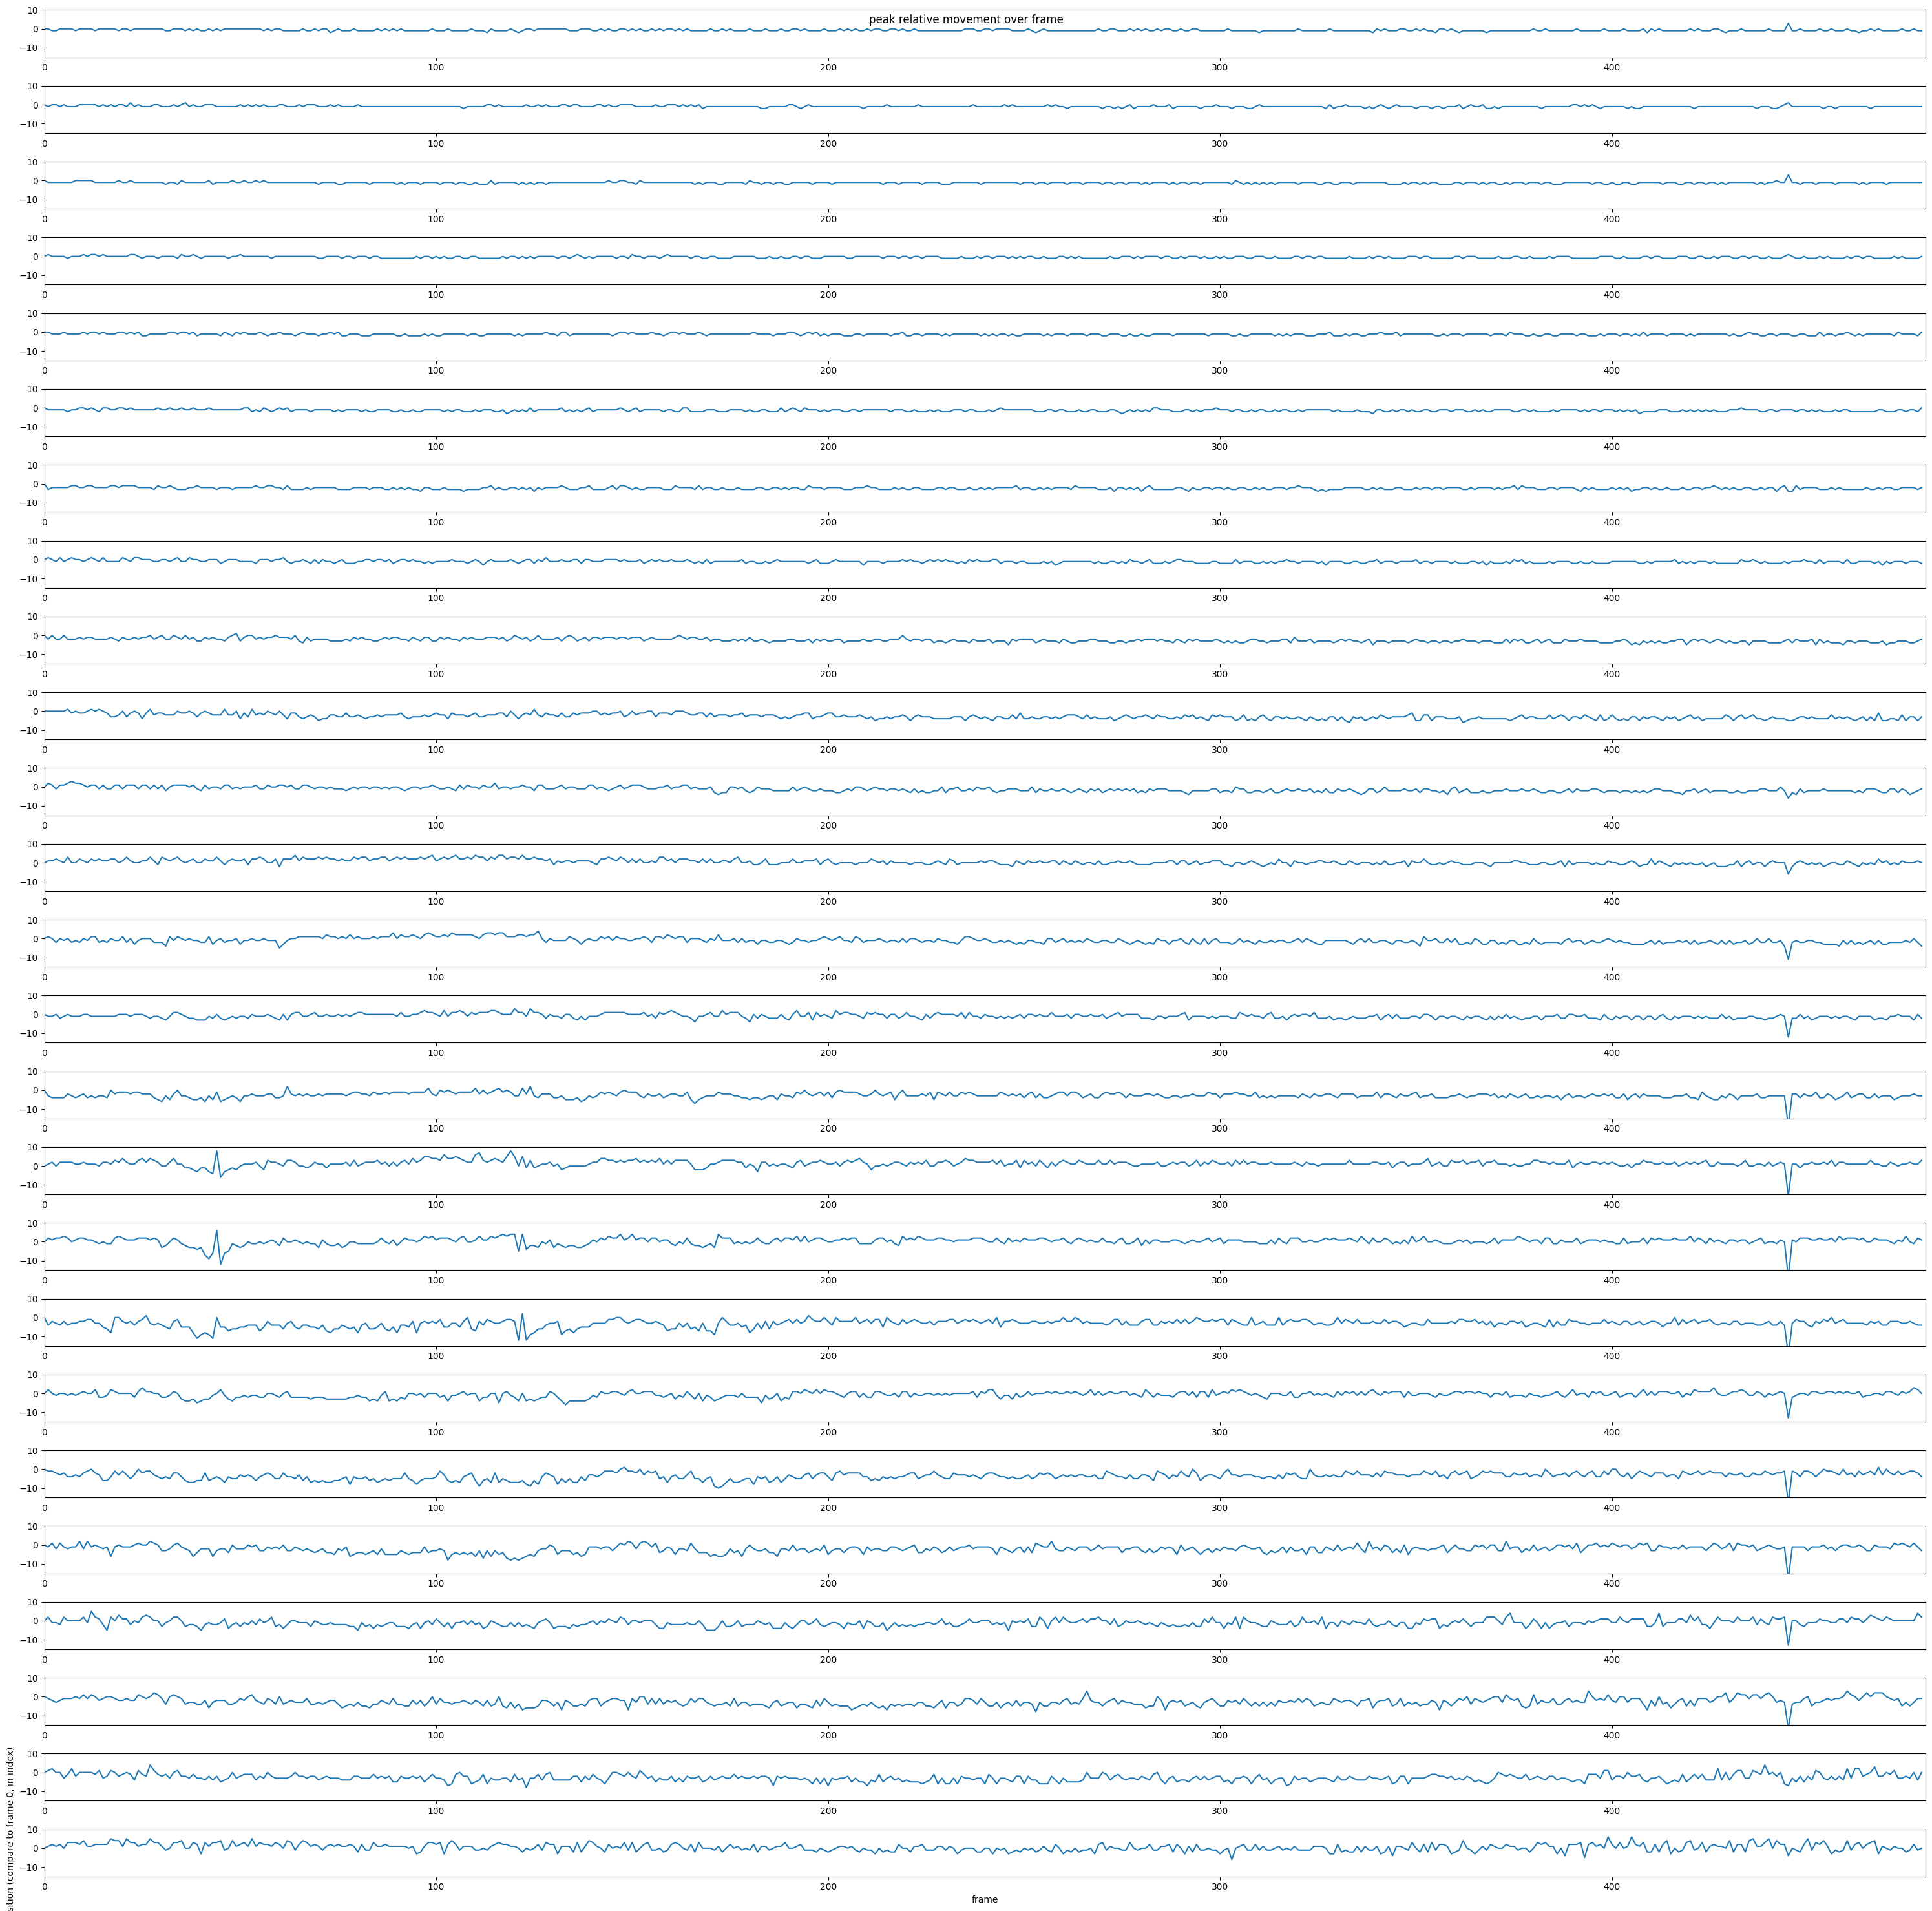

In [56]:
numPeaks = len(peaksFrame[0])
equalPeaks = []
for i in range(499):
    if len(peaksFrame[i]) == numPeaks:
        equalPeaks.append(peaksFrame[i] - peaksFrame[0])

equalPeaks = np.asarray(equalPeaks).transpose()

plt.clf()
fig, ax1 = plt.subplots(25)
fig.set_figheight(30)
fig.set_figwidth(30)

fig.set_tight_layout(True)
fig.suptitle("peak relative movement over frame")
plt.xlabel("frame")
plt.ylabel("relatvie position (compare to frame 0, in index)")
for i in range(25):
    ax1[i].set_ylim([-15, 10])
    ax1[i].set_xlim([0, 480])
    ax1[i].plot(equalPeaks[i])
plt.savefig('output/peak_over_frame.png')

<Figure size 640x480 with 0 Axes>

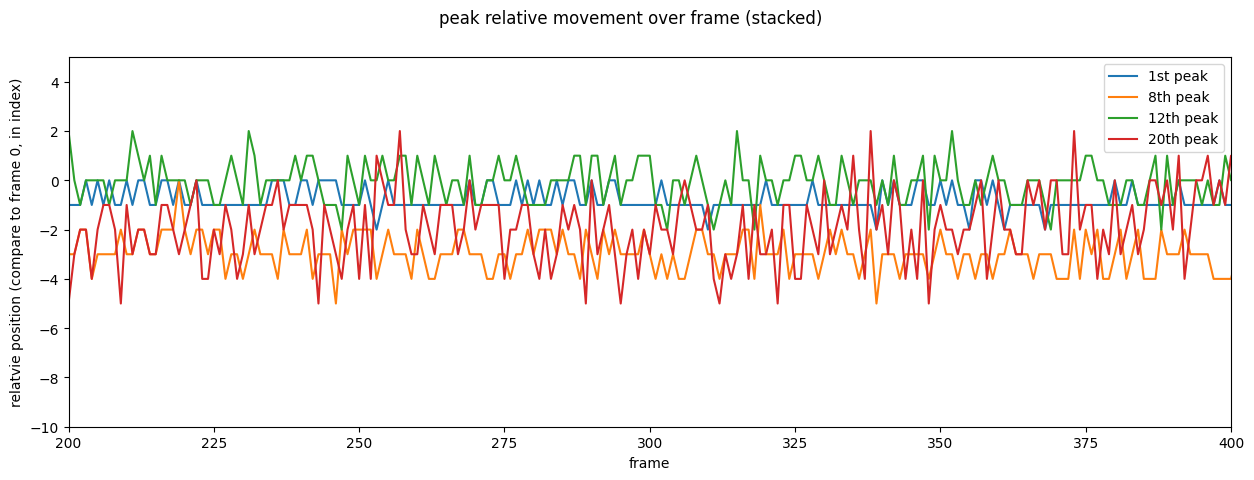

In [53]:
plt.clf()
fig, ax1 = plt.subplots(1)
fig.set_figwidth(15)


fig.suptitle("peak relative movement over frame (stacked)")
plt.xlabel("frame")
plt.ylabel("relatvie position (compare to frame 0, in index)")
plt.plot(equalPeaks[0])
plt.plot(equalPeaks[8])
plt.plot(equalPeaks[11])
plt.plot(equalPeaks[20])
plt.legend(['1st peak', '8th peak', '12th peak', '20th peak'])
ax1.set_ylim([-10, 5])
ax1.set_xlim([200, 400])
plt.savefig('output/peak_stacked.png')